## Json Based Mini - Project

The purpose of this project is to get some practice with some basic data wrangling and importation of json files.  We are given a file and asked to perform 3 tasks.  

1. Find the top ten countries with the most projects.
2. Determine the top ten project theme names (based on the mjtheme_codename column)
3. Create a dataframe with any missing values filled in

In [1]:
#Import required packages and modules
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load json file into dataframe: df
#print basic dataframe attributes
df = pd.read_json('world_bank_projects.json')
df_shape = df.shape
print(f'The dataset contains {df_shape[0]} observations and {df_shape[1]} columns')

The dataset contains 500 observations and 50 columns


In [3]:
# Find the top then countries with most projects.
#First we need to inspect the column names to see which column contains the countries
print(df.columns)

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'sector1', 'lendinginstr', 'countrycode', 'sector2', 'totalamt',
       'mjtheme_namecode', 'boardapprovaldate', 'countryshortname', 'sector4',
       'prodlinetext', 'productlinetype', 'regionname', 'status',
       'country_namecode', 'envassesmentcategorycode', 'project_abstract',
       'approvalfy', 'projectdocs', 'lendprojectcost', 'lendinginstrtype',
       'theme1', 'grantamt', 'themecode', 'borrower', 'sectorcode', 'sector3',
       'majorsector_percent', 'board_approval_month', 'theme_namecode',
       'countryname', 'url', 'source', 'projectstatusdisplay', 'ibrdcommamt',
       'sector_namecode', '_id'],
      dtype='object')


In [4]:
#Inspection of the column name reveals 'countryname' which can be used to determine the top 10 countries with the most projects.
most_projects = df['countryname'].value_counts().head(10)
print(most_projects)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Name: countryname, dtype: int64


In [5]:
#upon printing the results, we can see that Africa is 9th in the list.  Knowing Africa is a continent and not a country, is there a way to discover finer
#granularity to assign projects to the correct country?
#Select all rows with Africa as a country name, select all columns with countryname data
df[df['countryname'] == 'Africa'][['country_namecode','countrycode','countryshortname']]

,country_namecode,countrycode,countryshortname
45,Africa!$!3A,3A,Africa
46,Africa!$!3A,3A,Africa
51,Africa!$!3A,3A,Africa
58,Africa!$!3A,3A,Africa
65,Africa!$!3A,3A,Africa
99,Africa!$!3A,3A,Africa
167,Africa!$!3A,3A,Africa
184,Africa!$!3A,3A,Africa
287,Africa!$!3A,3A,Africa
353,Africa!$!3A,3A,Africa


In [6]:
#Since the subset of data is identical in every row and column, there is no way to assign these projects to the correct country.  
#We will disqualify Africa from the top ten coutries with projects as it is a continent.
#Select top 11 countries with projects and ignore Africa
df['countryname'].value_counts().head(11)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Kingdom of Morocco                 12
Nepal                              12
People's Republic of Bangladesh    12
Republic of Mozambique             11
Africa                             11
Burkina Faso                        9
Name: countryname, dtype: int64

In [7]:
#We need to be careful here.  We can see that in some instances there are countries with equal amount of projects indicating a tie in that position however,
#the value_counts function does not bin these countries and then set the position
#How we choose to rank this list matters.  We could bin the countries with equal amount of projects. For the sake of this assignment
#we will ignore ties in the top 9 positions and accept ties in the 10th position where project count is equal to 9
#The following output for top 10 countries with most projects is to be interpreted as ignoring Africa and accepting ties in the 10 position
top_ten_projects = df['countryname'].value_counts().head(13).to_frame()
top_ten_projects.drop(top_ten_projects.index[8],inplace=True)
top_ten_projects.columns = ['project_count']
top_ten_projects

,project_count
Republic of Indonesia,19
People's Republic of China,19
Socialist Republic of Vietnam,17
Republic of India,16
Republic of Yemen,13
Kingdom of Morocco,12
Nepal,12
People's Republic of Bangladesh,12
Africa,11
Burkina Faso,9


In [8]:
#quality check
#Since each observation in df is a project, the sum of the entire value_counts column should be equal to the length of df
#The length of the countryname.value_counts() index should be equal to the amount of unique countrynames in df
print(df['countryname'].value_counts().sum() == len(df))
print(len(df['countryname'].value_counts().index) == df['countryname'].nunique())

True
True


In [9]:
#Determine the top ten themes using the mjtheme_codename column
#Investigate the structure of the mjtheme_namecode column
print(type(df['mjtheme_namecode'][0]))
df['mjtheme_namecode']

<class 'list'>


0      [{'code': '8', 'name': 'Human development'}, {...
1      [{'code': '1', 'name': 'Economic management'},...
2      [{'code': '5', 'name': 'Trade and integration'...
3      [{'code': '7', 'name': 'Social dev/gender/incl...
4      [{'code': '5', 'name': 'Trade and integration'...
                             ...                        
495    [{'code': '4', 'name': 'Financial and private ...
496    [{'code': '8', 'name': 'Human development'}, {...
497    [{'code': '10', 'name': 'Rural development'}, ...
498    [{'code': '10', 'name': 'Rural development'}, ...
499    [{'code': '9', 'name': 'Urban development'}, {...
Name: mjtheme_namecode, Length: 500, dtype: object

In [10]:
#unpack mjtheme_namecode column with json_normalize
#we can see that the column is a series of lists containing one, to more than one dictionary/ies
data = [json_normalize(df['mjtheme_namecode'][i]) for i in range(0,500)]

#load into dataframe
mj_theme = pd.DataFrame()
mj_frame = mj_theme.append(data)

#create copy of mj_frame to use in alternate method of question 3
mj_frame_2 = mj_frame

#call head on mj_frame
mj_frame.head()



C:\Users\pseudo_bounce\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,code,name
0,8,Human development
1,11,
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration


In [11]:
#basic info on mj_theme dataframe
print(f'the length of the new dataframe is {len(mj_frame)} observations')

#Data quality check
#Since the series of mj_themes is a series of lists containing one, to more than one dictionary we need to verify that json_normalize worked
#as expected.  We can do this by counting the number of times 0 shows up in the index as 0 would represent the first dictionary of dictionaries in the of lists.
#This value should be equal to the length of the original dataframe: df
print(sum(mj_frame.index == 0) == len(df))

the length of the new dataframe is 1499 observations
True


In [12]:
#Question two in the exercise asks to determine the top ten project themes with the mjtheme_namecolumn.  We could do that now, however it may lead
#to a misleading result as we can see in the mj_frame head that there are missing values.  If we were to call value_counts() on the name column
#at this point there is a possibilty that once the correct values are imputed (as question 3 asks to do) the results may very.
#we will do this now to cross-reference the results after we have completed question 3
top_ten_missing = mj_frame['name'].value_counts().head(10)
print(top_ten_missing)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64


In [13]:
#from the above series we can see that there are 122 empty string in the name column.  We know these are empty strings and not NaNs as there is
#no string representing the count of 122.  
#Completing the dataframe must be done prior to answering question 2
#To impute the empty strings we need to first create a structure that contains the codes and corresponding theme names
code_name_frame = mj_frame.loc[mj_frame['name'] != ''].drop_duplicates().reset_index().drop('index',axis=1)
code_name_frame

,code,name
0,8,Human development
1,1,Economic management
2,6,Social protection and risk management
3,5,Trade and integration
4,2,Public sector governance
5,11,Environment and natural resources management
6,7,Social dev/gender/inclusion
7,4,Financial and private sector development
8,10,Rural development
9,9,Urban development


In [14]:
#Alternate (more involved) method of creating the code_name_frame
code = []
name = []
for index, row in mj_frame.iterrows():
    if row['name'] == '':
        continue
    else:
        code.append(row['code'])
        name.append(row['name'])
        
d = {'code':code,'theme_name':name}
code_name_frame_2 = pd.DataFrame(d).drop_duplicates().reset_index().drop('index',axis=1)
code_name_frame_2

,code,theme_name
0,8,Human development
1,1,Economic management
2,6,Social protection and risk management
3,5,Trade and integration
4,2,Public sector governance
5,11,Environment and natural resources management
6,7,Social dev/gender/inclusion
7,4,Financial and private sector development
8,10,Rural development
9,9,Urban development


In [15]:
#Question 3 asks to fill in the missing information from the mj_frame['name'] column
# use pd.merge to join the code_name_frame with mj_theme to fill in values
mj_frame_imputed = pd.merge(mj_frame, code_name_frame, on='code', how='left').drop('name_x',axis=1)
#rename columns
mj_frame_imputed.columns = ['code','theme_name']
mj_frame_imputed.head(10)

,code,theme_name
0,8,Human development
1,11,Environment and natural resources management
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration
5,2,Public sector governance
6,11,Environment and natural resources management
7,6,Social protection and risk management
8,7,Social dev/gender/inclusion
9,7,Social dev/gender/inclusion


In [16]:
#With the imputed dataframe we can now respond to question two in a more accurate manner
top_ten_imputed = mj_frame_imputed['theme_name'].value_counts().head(10).to_frame()
top_ten_imputed.columns = ['theme_name_count']
top_ten_imputed

,theme_name_count
Environment and natural resources management,250
Rural development,216
Human development,210
Public sector governance,199
Social protection and risk management,168
Financial and private sector development,146
Social dev/gender/inclusion,130
Trade and integration,77
Urban development,50
Economic management,38


In [17]:
#alternate method to impute dataframe
#create a dictionary and map to the missing values
theme_dict = dict(zip(code_name_frame.code,code_name_frame.name))
print(theme_dict)

{'8': 'Human development', '1': 'Economic management', '6': 'Social protection and risk management', '5': 'Trade and integration', '2': 'Public sector governance', '11': 'Environment and natural resources management', '7': 'Social dev/gender/inclusion', '4': 'Financial and private sector development', '10': 'Rural development', '9': 'Urban development', '3': 'Rule of law'}


In [18]:
#replace the empty strings with NaNs so we can map dictionary values to NaN's
#Important to note that we must replace empty strings with NaN's for fillna to work properly
mj_frame_2['name'].replace('',np.NaN,inplace=True)

In [19]:
#Verify previous method works as expected
mj_frame_2.isnull().sum()

code      0
name    122
dtype: int64

In [20]:
#Impute the missing values in the name column via theme dictionary mapping
mj_frame_2['name'] = mj_frame_2['name'].fillna(mj_frame_2['code'].map(theme_dict))

In [21]:
mj_frame_2.isnull().sum()

code    0
name    0
dtype: int64

In [22]:
mj_frame_2.head(15)

,code,name
0,8,Human development
1,11,Environment and natural resources management
0,1,Economic management
1,6,Social protection and risk management
0,5,Trade and integration
1,2,Public sector governance
2,11,Environment and natural resources management
3,6,Social protection and risk management
0,7,Social dev/gender/inclusion
1,7,Social dev/gender/inclusion


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text xticklabel objects>)

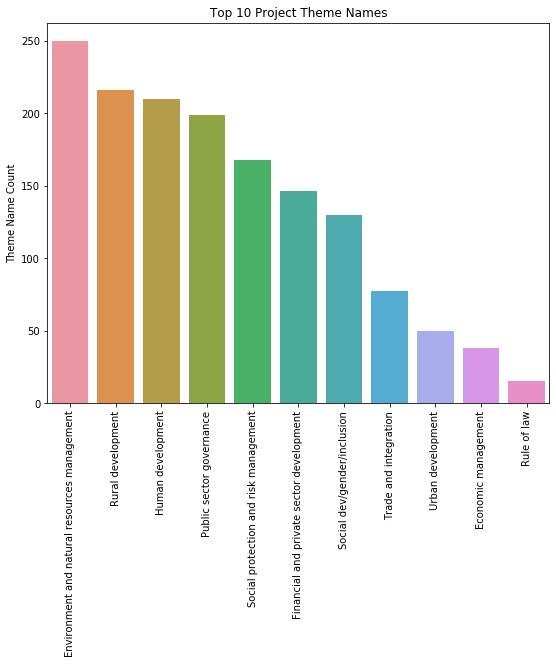

In [23]:
#Basic visualisations
#Top ten theme name bar plot with seaborn
plt.rcParams['figure.figsize'] = 9,7
sns.barplot(x=mj_frame['name'].value_counts().index,y = mj_frame['name'].value_counts())
plt.title('Top 10 Project Theme Names')
plt.ylabel('Theme Name Count')
plt.xticks(rotation=90)

Text(0.5, 1.0, 'Top 10 Project Theme Names')

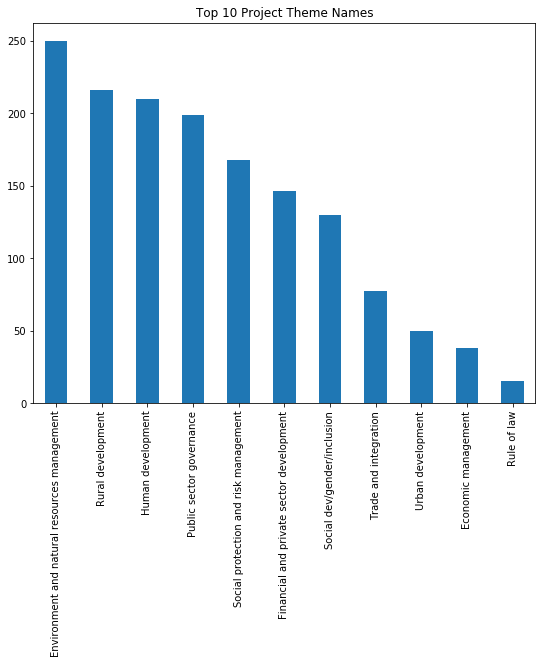

In [24]:
#Same plot as above using pandas plotting function
mj_frame['name'].value_counts().plot(kind='bar')
plt.title('Top 10 Project Theme Names')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

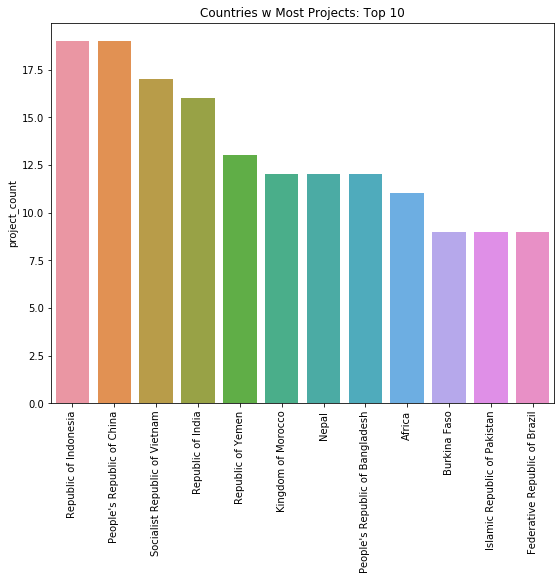

In [25]:
#Top ten projects plot (as interpreted with ties on the 10th position) top 10 with seaborn
sns.barplot(top_ten_projects.index,top_ten_projects['project_count'])
plt.title('Countries w Most Projects: Top 10')
plt.xticks(rotation=90)

Text(0, 0.5, 'Project Count')

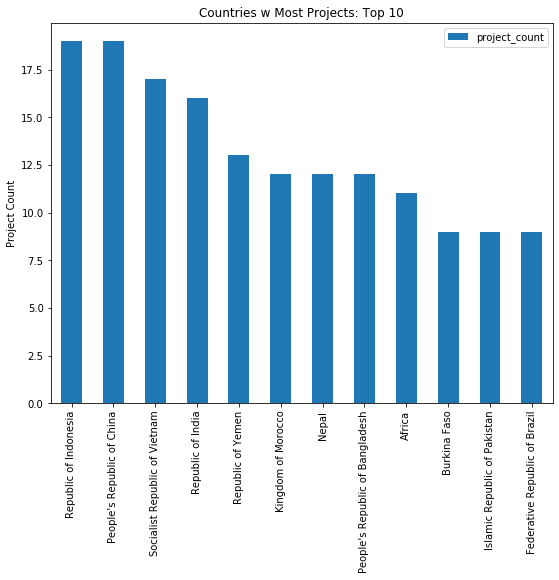

In [26]:
#Top ten projects plot (as interpreted with ties on the 10th position) with pandas plotting
top_ten_projects.plot(kind='bar')
plt.title('Countries w Most Projects: Top 10')
plt.ylabel("Project Count")